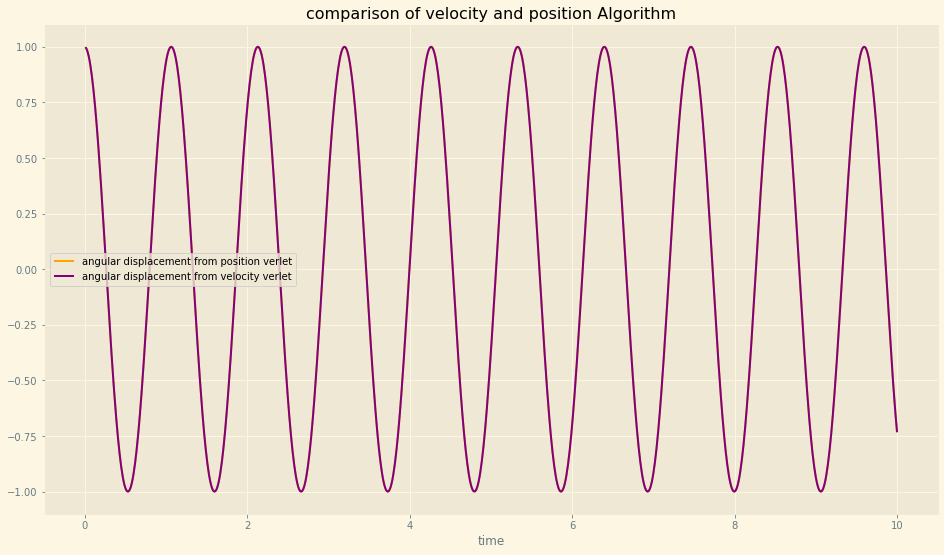

In [2]:
# verlet algorithm

# Import libraries 
from matplotlib import pylab as plt   
import numpy as m
from matplotlib import style
style.use('seaborn-dark-palette')
style.use('Solarize_Light2')

# imagine a simpler situation when you have simply an oscillating pendulum in vacuum and fixed pivot. 
# defining the acceleration
def A(X):
    return -4*m.pi*m.pi*m.sin(X)  #acceleration

# defining the energy
# this is essentially total energy, it is taking two variable because to define each state you always need both position and velocity of particle.
def erg(x, v):
    return (0.5 * v * v + 0.5 * 4 * m.pi * m.pi * x ** 2) / (2 * m.pi * m.pi)

# INITIAL CONDITIONS and PARAMETERS of SIMULATION
X=X_=1.0
V=V_=0.0
T=0.0
end_T=10
d_T=0.01
N=int(end_T/d_T)


# again defining our historians 
T_list = []
X_list = []
V_list = []
X__list = []
V__list = []
E_list = []
E__list = []


# main loop where we are implimenting our algorithm recursively.
# you can omit 0 in the paranthesis of loop since it's default initial value is 0.
for i in range (0,N):  
    
    # Velocity verlet
    V_ = V_ + d_T * 0.5 * A(X_)
    X_ = X_ + d_T * V_
    V_ = V_ + d_T * 0.5 * A(X_)
    # Position verlet
    X = X + d_T * 0.5 * V
    V = V + d_T * A(X)
    X = X + d_T * 0.5 * V

    # notice above; how updated variables are getting used. 

    T=T+d_T

    X_list.append(X)
    V_list.append(V)
    E_list.append(erg(X,V))

    T_list.append(T)

    X__list.append(X_)
    V__list.append(V_)
    E__list.append(erg(X_,V_))
    
# This is to fix size of plot 
plt.figure(figsize = (16,9))

plt.title("comparison of velocity and position Algorithm")
plt.xlabel("time")
plt.plot(T_list,X_list,color='orange',label='angular displacement from position verlet')
plt.plot(T_list,X__list,color='purple',label='angular displacement from velocity verlet')
plt.legend()
plt.show()

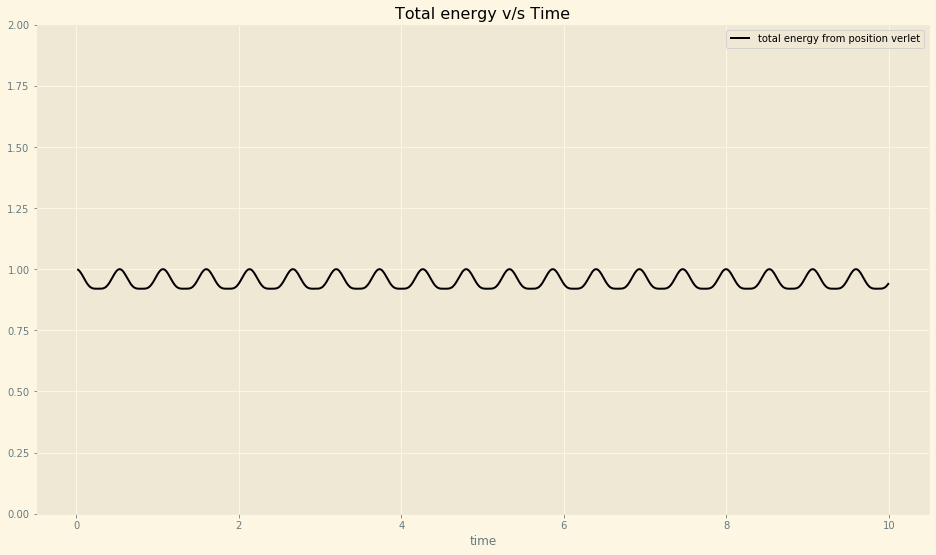

In [4]:
## total Energy 
# you can plot simply kinetic energy but essentially we want to see it's error. 
# also we can use any algorithm it doesn't matter in energy analysis
plt.figure(figsize=(16,9))
plt.title("Total energy v/s Time")
plt.xlabel("time")

# you should be thinking we didn't add it before in previous codes, you can see why we added it now after removing it.
plt.ylim(0,2)
plt.plot(T_list,E_list,color='black',label='total energy from position verlet')
plt.legend()
plt.show()